### mnist 预处理

归一化前y_train
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1] 


归一化 y_train: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1] 


归一化后,独热编码y_train: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 

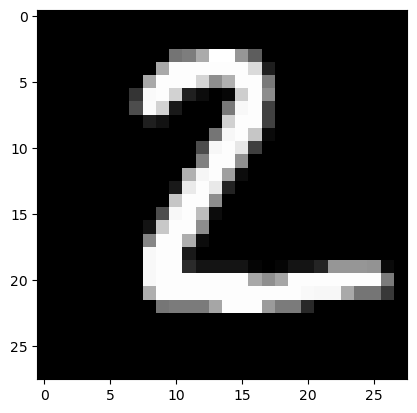

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# 归一化
print("归一化前y_train\n",y_train[0:100],"\n")
# 独热编码 
# y_train=to_categorical(y_train,num_classes=10)
# print("\n归一化前,独热编码y_train:",y_train[0:100],"\n")


x_train=x_train/255.0
x_test=x_test/255.0

# y_train=y_train/255.0
# y_test=y_test/255.0

print("\n归一化 y_train:",y_train[0:100],"\n")

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

print("\n归一化后,独热编码y_train:",y_train[0:100],"\n")
# print(x_test[1],"\n")
# print(y_train[0:100])
import matplotlib.pyplot as plt
plt.imshow(x_test[1],cmap="gray")

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import RMSprop

### 搭建 FCN-Net 网络
Flatten - 扁平化层  
Dense - 全连接层

In [5]:
model = Sequential(name="FCN-Net")
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.summary()

Model: "FCN-Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________


#### 损失()+梯度()

In [6]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=RMSprop())

### 训练 FCN-Net  
model.fit()  
设置 epochs、batch_size、validation_split（指定用于验证的数据比例）  
model_info.history["loss"]

In [7]:
model_info=model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=16,
          validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test)
print (accuracy)

Epoch 1/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3058 - accuracy: 0.9101 - val_loss: 0.1674 - val_accuracy: 0.9511
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1559 - accuracy: 0.9550 - val_loss: 0.1493 - val_accuracy: 0.9589
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1279 - accuracy: 0.9654 - val_loss: 0.1366 - val_accuracy: 0.9648
Epoch 4/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1095 - accuracy: 0.9706 - val_loss: 0.1424 - val_accuracy: 0.9631
Epoch 5/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0987 - accuracy: 0.9734 - val_loss: 0.1572 - val_accuracy: 0.9668
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0920 - accuracy: 0.9752 - val_loss: 0.1549 - val_accuracy: 0.9675
Epoch 7/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0850 - accuracy: 0.9785 - val_loss: 0.1675 - val_accuracy:

In [8]:
model.save_weights("FCN-Net.h5")

### 绘制 history 曲线

[0.9101041555404663, 0.9550416469573975, 0.965416669845581, 0.9706458449363708, 0.9734166860580444, 0.9752083420753479, 0.9785208106040955, 0.9796249866485596, 0.9803541898727417, 0.9819583296775818]


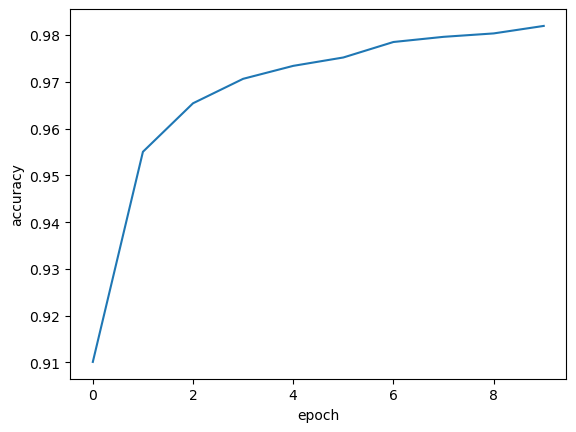

In [9]:
import matplotlib.pyplot as plt
y=model_info.history["accuracy"]
print(y)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(range(0,len(model_info.history["accuracy"])),y)
plt.show()